Лабораторная работа №3
Проверка статистических гипотез о виде закона распределения.
Вариант 10. Y = ln(x); a = 1; b = 5; y0 = 1

Задание 1. Доверительный интервал для математического ожидания СВ.

Импортируем необходимые библиотеки:

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

n = 200 #задается вручную

# из 1-й ЛР
a = 1.
b = 5.

# формируем выборку
def get_sample(n):
    sample_X = []
    sample_Y = []
    uniform_rv = sts.uniform()
    sample_xi = uniform_rv.rvs(size=n)

    for i in range(n):
        x = sample_xi[i] * (b - a) + a
        sample_X.append(x)
        y = np.log(x)
        sample_Y.append(y)
    return sample_Y

sample_Y = get_sample(n)
print(sample_Y)

[0.6291307100101184, 0.917570784113939, 1.0141607260455214, 1.5767897687827244, 1.5282794318791766, 1.029892644686739, 1.4713304029861758, 0.2111632245395168, 0.8922296015785774, 1.06786438453889, 0.5175154725741614, 1.1768631110369405, 1.59607063729793, 1.0559554468025774, 1.4466723912631718, 1.5065833100550892, 0.9174071416029932, 0.9796013395383772, 0.29745179795016574, 1.2387630458267604, 0.29150688667199903, 0.20167299686736836, 0.8095723762301185, 1.5763752775950226, 1.1513146890265376, 0.38087320300239763, 0.38762377155916644, 1.5012169939518911, 1.415701939245546, 0.21552598625883282, 1.1044791731772272, 0.5066102176183057, 1.3074895411924692, 1.487413078072539, 1.3050175920932632, 0.9265522676868589, 0.4513854872108571, 1.4970104382691427, 0.9159915961040288, 1.551716560003456, 0.9012880634485391, 1.2845468192742993, 1.453409501397979, 0.669241328875595, 1.2884361555013588, 0.040241039035001216, 0.5829610668073575, 0.7470720871006596, 1.4674878829903042, 1.4456874536833557, 1.

Первым шагом метода Пирсона построим гистограмму равновероятностным способом, а также теоретическую плотность:

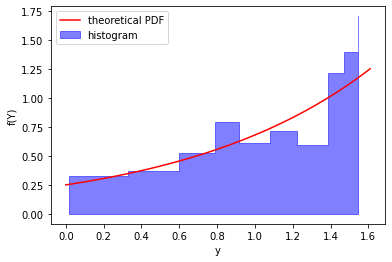

In [19]:
M = 10 # int(np.sqrt(n)) if n <= 100 else int(3 * np.log10(n)) # эмпирически определяем количество интервалов
m = n // M                                                # количество элементов в каждом интервале

def hist_eq_prob(sample):
    sample.sort()
    A = [sample[0]]
    B = []
    for i in range(1, M):
        A.append(sample[i * m])
        B.append(sample[i * m])
    B.append(sample[-1])
    d = []
    for i in range(len(A)):
        d.append(B[i] - A[i])
    y = []
    x = []
    s = A[0]
 
    for i in d:
        y.append(1. /(M * i))
        x.append(s)
        s += i
        
    return (A, B, d, x, y)

A, B, d, x, y = hist_eq_prob(sample_Y)
plt.fill_between(x, y1=y, y2=[0]*len(y), color='b', step='post', alpha=0.5, label="histogram")

xx = np.linspace(np.log(1), np.log(5), 100)
py = np.exp(xx) / 4
plt.plot(xx, py, label='theoretical PDF', c='r')

plt.legend(loc='upper left')
plt.xlabel("y")
plt.ylabel("f(Y)")
plt.show()

Видим, что гистограмма и плотность очень похожи. Выдвинем гипотезу H_0, что наши эмпирическое и теоретическое распределения согласуются, и будем проверять ее посредством χ^2 статистики. Пусть для определенности будем проверять для вероятности ошибки первого рода α = 0.01.

In [20]:
table = pd.DataFrame(data={"$A_i$" : A, "$B_i$": B, "$d_i$": d, "$v_i$": [m]*len(d), "$f_i$": y})
table

,$A_i$,$B_i$,$d_i$,$v_i$,$f_i$
0,0.019083,0.329034,0.309951,20,0.322632
1,0.329034,0.600486,0.271452,20,0.368389
2,0.600486,0.791593,0.191107,20,0.523267
3,0.791593,0.917571,0.125978,20,0.793791
4,0.917571,1.080905,0.163334,20,0.612242
5,1.080905,1.220250,0.139345,20,0.717645
6,1.220250,1.388654,0.168404,20,0.593809
7,1.388654,1.471330,0.082677,20,1.209533
8,1.471330,1.543208,0.071878,20,1.391251
9,1.543208,1.601946,0.058738,20,1.702473


In [21]:
p = []
p_ = [m / n] * len(A)
FB = []
FA = []

for i in range(len(A)):
    FB.append(np.exp(B[i]))
    FA.append(np.exp(A[i]))
    p.append(1./4. * (np.exp(B[i]) - np.exp(A[i])))

In [22]:
chi = []

for i in range(len(A)):
    chi.append(n * (p[i] - p_[i])**2 / p[i])
    
table2 = pd.DataFrame(data={"$F(A_i)$" : FA, "$F(B_i)$": FB, "$p_i$": p, "$p_i^*$": p_, "$\chi_i$": chi})
table2    

,$F(A_i)$,$F(B_i)$,$p_i$,$p_i^*$,$\chi_i$
0,1.019266,1.389624,0.092590,0.1,0.118618
1,1.389624,1.823005,0.108345,0.1,0.128551
2,1.823005,2.206909,0.095976,0.1,0.033739
3,2.206909,2.503202,0.074073,0.1,1.814960
4,2.503202,2.947346,0.111036,0.1,0.219372
5,2.947346,3.388034,0.110172,0.1,0.187832
6,3.388034,4.009449,0.155354,0.1,3.944613
7,4.009449,4.355025,0.086394,0.1,0.428556
8,4.355025,4.679579,0.081138,0.1,0.876915
9,4.679579,4.962682,0.070776,0.1,2.413434


Найдем статистику χ^2:

In [23]:
chi_stat = sum(chi)
print(chi_stat)

10.166589567862014


Найдем количество степеней свободы. Так как наше распределение не зависит ни от каких параметров, то количество степеней свободы будет равнятся: k = M - 1

In [24]:
k = M - 1
print(k)

9


In [25]:
from scipy.stats import chi2
t_chi = chi2.isf(0.01, k)
t_chi

21.665994333461928

In [26]:
# за гипотезу принимаем f(x) = f0(x), где f0 плотность вероятности теоретического закона распределения
if t_chi > chi_stat:
    print("Нет основнаний отклонять гипотезу")
else:
    print("Гипотизу следует оклонить")

Нет основнаний отклонять гипотезу


Задание 2. В соответствии с вариантом (см. задание 1) сформировать выборку из 30 случайных чисел. Проверить гипотезу о соответствии выборке теоретическому закону распределения по критерию согласия Колмогорова.

In [27]:
n = 30
sample_Y2 = get_sample(n)

Построим вариационный ряд:

In [28]:
sample_Y2.sort()
table_row = pd.DataFrame(data={"Значение": sample_Y2})
table_row.T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Значение,0.263999,0.342742,0.385223,0.476895,0.579275,0.676246,0.736902,0.79538,0.873221,0.874913,...,1.375896,1.385187,1.392962,1.424023,1.453865,1.497065,1.535387,1.536368,1.536958,1.604621


Построим графики теоретической и эмпирической функций распределения:

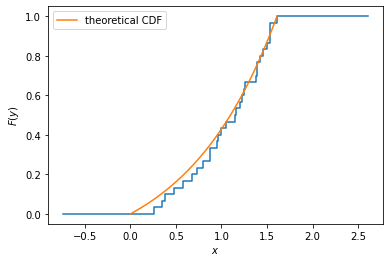

In [29]:
# для построения ECDF (эмпирическая функция распределения) используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
order_Y2 = sorted(sample_Y2)
plt.step([min(order_Y2) - 1] + [y for y in order_Y2] + [max(order_Y2) + 1], [0] + [index/ len(order_Y2) for index in range(len(order_Y2))] + [1])    
#ecdf = ECDF(sample_Y2)
#plt.step(ecdf.x, ecdf.y, label='ECDF')

xx = np.linspace(np.log(1), np.log(5), 100)
yy = (np.exp(xx) - 1) / 4
plt.plot(xx, yy, label='theoretical CDF')

plt.ylabel('$F(y)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')
plt.show()

Видим, что гистограмма и плотность очень похожи. Выдвинем гипотезу H_0, что наши эмпирическое и теоретическое распределения согласуются, и будем проверять ее посредством критерия Колмогорова. Пусть для определенности будем проверять для вероятности ошибки первого рода α = 0.05.

In [30]:
def F(x):
    return (np.exp(x) - 1) / 4

dp = []
dm = []

for i in range(n - 1):
    dp.append(abs((i + 1) / n - F(sample_Y2[i])))
    dm.append(abs(i / n - F(sample_Y2[i])))
    
d = max(max(dm), max(dp))
print (d)

0.08198618936743524


In [31]:
l = d * np.sqrt(n)
print(l)

0.44905685320434485


In [32]:
t_lambda = 1.36
if l < t_lambda:
    print("Гипотеза принимается, но она может быть не верна")
else:
    print("Гипотеза отклоняется")

Гипотеза принимается, но она может быть не верна


Задание 3. В соответствии с вариантом (см. задание 1) сформировать выборку из 50 случайных чисел. Проверить гипотезу о соответствии выборке теоретическому закону распределения по критерию согласия Мизеса.

In [33]:
n = 50
sample_Y3 = get_sample(n)
sample_Y3.sort()

Выдвинем гипотезу H_0, что наши эмпирическое и теоретическое распределения согласуются, и будем проверять ее посредством критерия Мизеса. Пусть для определенности будем проверять для вероятности ошибки первого рода α = 0.05.

In [34]:
Fny = []
F0y = []
delta = []

for i in range(n):
    Fny.append((i + 0.5) / n) # знак +, т.к. нумерация начинается с нуля
    F0y.append(F(sample_Y3[i]))
    delta.append((Fny[i] - F0y[i])**2)

table3 = pd.DataFrame(data={"$y$": sample_Y3, "$F_n$": Fny, "$F$": F0y, "$\delta$": delta})
table3

,$y$,$F_n$,$F$,$\delta$
0,0.249793,0.01,0.070940,0.003714
1,0.258325,0.03,0.073690,0.001909
2,0.324825,0.05,0.095947,0.002111
3,0.441695,0.07,0.138836,0.004738
4,0.471902,0.09,0.150760,0.003692
5,0.473583,0.11,0.151434,0.001717
6,0.590599,0.13,0.201267,0.005079
7,0.606944,0.15,0.208704,0.003446
8,0.618107,0.17,0.213853,0.001923
9,0.618309,0.19,0.213947,0.000573


In [35]:
stat3 = 1. / (4 * n) + sum(delta)
print(stat3)

0.1354548148202646


In [36]:
if stat3 < 0.461:
    print("Нет оснований отклонять гипотезу")
else:
    print("Гипотезу следует отклонить")

Нет оснований отклонять гипотезу
